In [2]:
#Install libraries first
#!pip install yfinance
#! pip install pykalman

     -------------------------------------- 228.9/228.9 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pykalman: filename=pykalman-0.9.5-py3-none-any.whl size=48450 sha256=c56c52d8e7d369dabf5ab68fdf8d3116ba9842f6d9ab058200f7e316fb1b3537
  Stored in directory: c:\users\vksch\appdata\local\pip\cache\wheels\05\c8\d9\6f343bfea436aa40ad725f7815e3e735b5b42518fded200cd2
Successfully built pykalman


In [3]:
#Let's take a stock series example
import yfinance as yf
data = yf.download("NVDA", start="2020-01-01", end="2023-10-31")

[*********************100%%**********************]  1 of 1 completed


In [4]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.749302,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.792946,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.039509,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.754265,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.866348,27710800


In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-24,430.769989,436.970001,426.910004,436.630005,436.630005,40146300
2023-10-25,433.980011,436.500000,415.549988,417.790009,417.790009,39837900
2023-10-26,418.529999,422.559998,398.799988,403.260010,403.260010,54100100
2023-10-27,411.299988,412.059998,400.149994,405.000000,405.000000,41678400
2023-10-30,410.869995,417.660004,404.809998,411.609985,411.609985,38802800


In [6]:
X = data['Adj Close']
X

Date
2020-01-02     59.749302
2020-01-03     58.792946
2020-01-06     59.039509
2020-01-07     59.754265
2020-01-08     59.866348
                 ...    
2023-10-24    436.630005
2023-10-25    417.790009
2023-10-26    403.260010
2023-10-27    405.000000
2023-10-30    411.609985
Name: Adj Close, Length: 964, dtype: float64

* The Kalman Filter is a unsupervised algorithm for tracking a single object in a continuous state space. Given a sequence of noisy measurements, the Kalman Filter is able to recover the “true state” of the underling object being tracked.
* The advantages of Kalman Filter are:

* No need to provide labeled training data
  Ability to handle noisy observations
* The disadvantages are:

  Computational complexity is cubic in the size of the state space
  Parameter optimization is non-convex and can thus only find local optima
  Inability to cope with non-Gaussian noise

In [ ]:
#need to add more example on theory- TBD

In [7]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Construct a Kalman filter
kf = KalmanFilter(transition_matrices = [1],    # The value for At. It is a random walk so is set to 1.0
                  observation_matrices = [1],   # The value for Ht.
                  initial_state_mean = 0,       # Any initial value. It will converge to the true state value.
                  initial_state_covariance = 1, # Sigma value for the Qt in Equation (1) the Gaussian distribution
                  observation_covariance=1,     # Sigma value for the Rt in Equation (2) the Gaussian distribution
                  transition_covariance=.01)    # A small turbulence in the random walk parameter 1.0
# Get the Kalman smoothing
state_means, _ = kf.filter(data['Adj Close'].values)
state_means

array([[ 29.87465096],
       [ 39.64175718],
       [ 44.6467984 ],
       [ 47.8400632 ],
       [ 50.01979455],
       [ 51.7061534 ],
       [ 53.03802746],
       [ 54.34714677],
       [ 55.26216117],
       [ 55.97005036],
       [ 56.66349027],
       [ 57.26599265],
       [ 57.75052697],
       [ 58.22989098],
       [ 58.72156457],
       [ 59.09502808],
       [ 59.16821949],
       [ 59.42629722],
       [ 59.59684428],
       [ 59.75606469],
       [ 59.67080298],
       [ 59.68859204],
       [ 59.86850165],
       [ 60.11771597],
       [ 60.4259534 ],
       [ 60.64032198],
       [ 61.10547937],
       [ 61.64275387],
       [ 62.23877068],
       [ 62.73541032],
       [ 63.63619738],
       [ 64.61156609],
       [ 65.92394911],
       [ 66.968276  ],
       [ 67.56560006],
       [ 67.61269601],
       [ 67.38896807],
       [ 67.3193679 ],
       [ 66.90318582],
       [ 66.94103549],
       [ 67.12611401],
       [ 67.04361624],
       [ 67.41050006],
       [ 67

In [8]:
data['KF_mean'] = np.array(state_means)
data.head()

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.749302,23753600,29.874651
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.792946,20538400,39.641757
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.039509,26263600,44.646798
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.754265,31485600,47.840063
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.866348,27710800,50.019795


In [15]:
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,KF_mean
Date,,,,,,,
2023-10-17,440.000000,447.540009,424.799988,439.380005,439.380005,81233300,449.043898
2023-10-18,425.910004,432.190002,418.250000,421.959991,421.959991,62729400,446.467543
2023-10-19,428.109985,432.970001,418.820007,421.010010,421.010010,50123300,444.045897
2023-10-20,418.899994,424.700012,410.779999,413.869995,413.869995,47638100,441.175417
2023-10-23,412.290009,432.480011,409.450012,429.750000,429.750000,47853000,440.088575
2023-10-24,430.769989,436.970001,426.910004,436.630005,436.630005,40146300,439.759579
2023-10-25,433.980011,436.500000,415.549988,417.790009,417.790009,39837900,437.669725
2023-10-26,418.529999,422.559998,398.799988,403.260010,403.260010,54100100,434.396504
2023-10-27,411.299988,412.059998,400.149994,405.000000,405.000000,41678400,431.600164


Text(0, 0.5, 'Price')

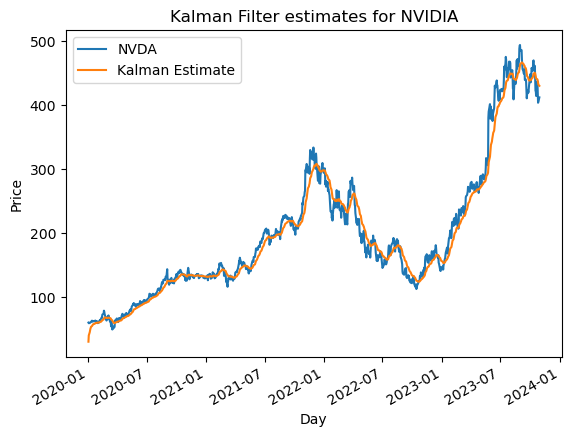

In [14]:
data[['Adj Close','KF_mean']].plot()
plt.title('Kalman Filter estimates for NVIDIA')
plt.legend(['NVDA','Kalman Estimate'])
plt.xlabel('Day')
plt.ylabel('Price')

### A Moving objective

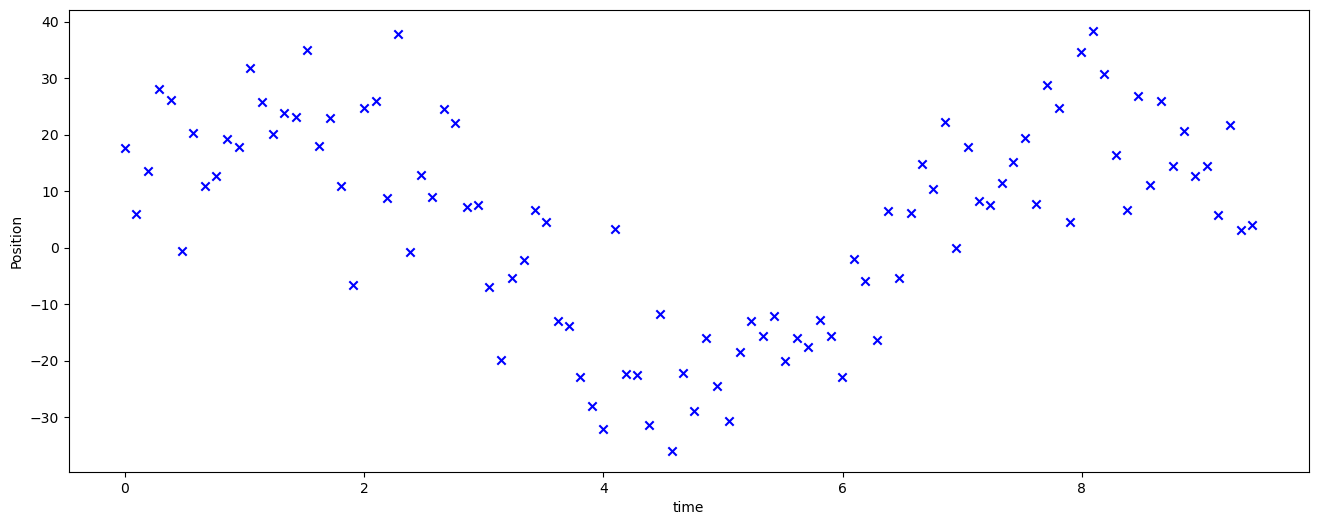

In [10]:
import numpy as np
import pylab as pl
from pykalman import KalmanFilter

rnd = np.random.RandomState(0)
n_timesteps = 100
x = np.linspace(0, 3 * np.pi, n_timesteps)
y = 20 * (np.sin(x) + 0.5 * rnd.randn(n_timesteps))
pl.figure(figsize=(16, 6))
pl.scatter(x,y, marker='x', color='b', label='observations')
pl.xlabel('time')
pl.ylabel('Position')
pl.show()

In [11]:
kf = KalmanFilter(transition_matrices=np.array([[1, 1], [0, 1]]),
                  transition_covariance=0.01 * np.eye(2))
states_pred = kf.em(y).smooth(y)[0]

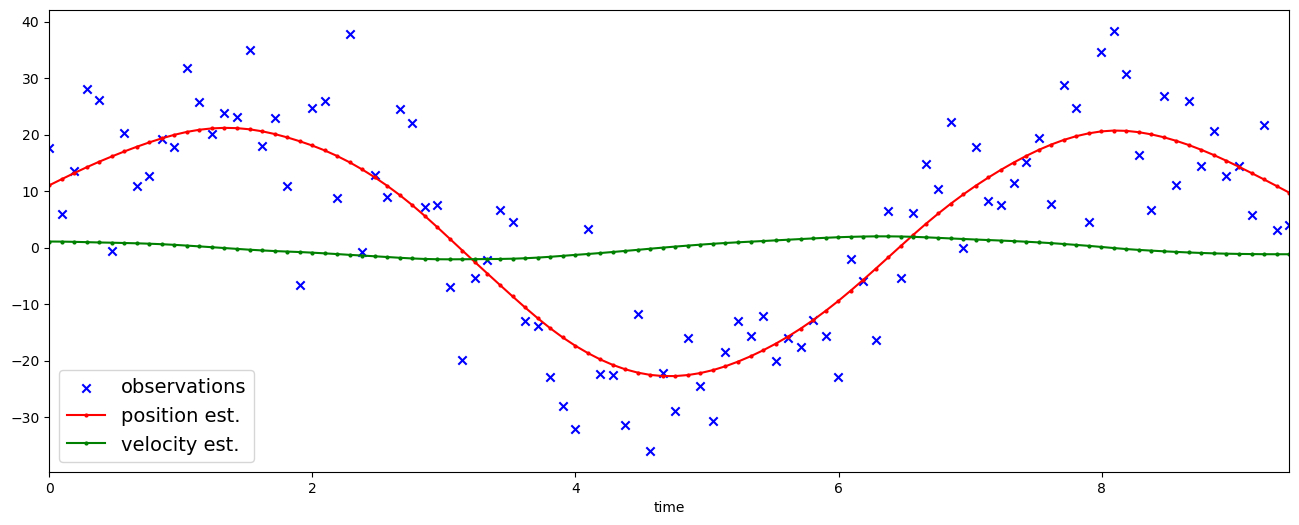

In [12]:
pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred[:, 0],markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
velocity_line = pl.plot(x, states_pred[:, 1],markersize=2,
                        linestyle='-', marker='o', color='g',
                        label='velocity est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.show()  

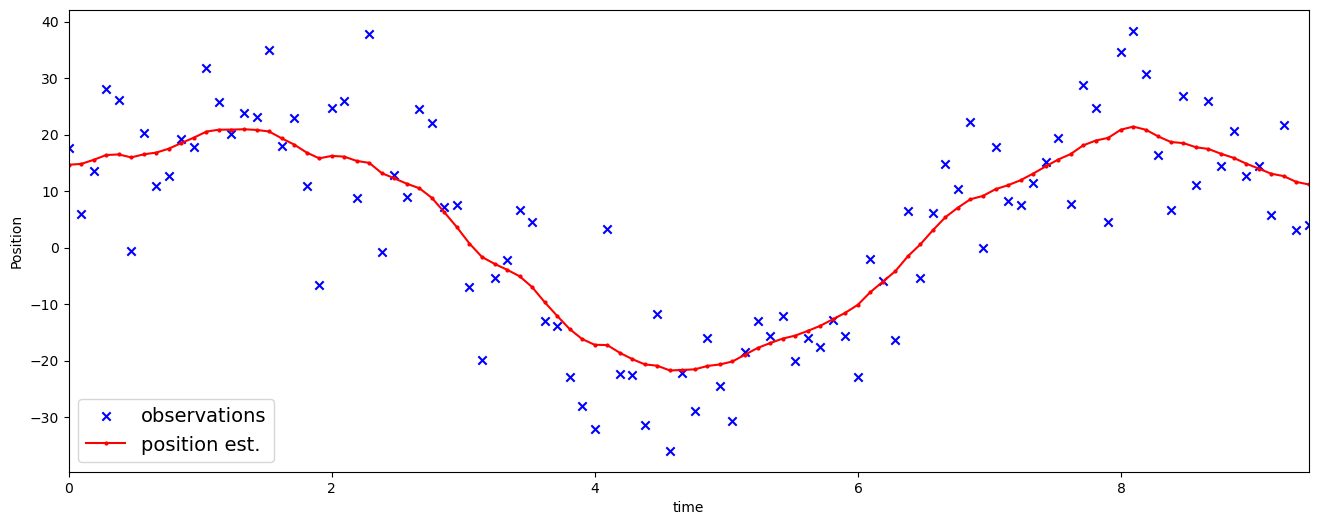

In [13]:
kf = KalmanFilter(transition_matrices=[1],
                  transition_covariance=0.01)
states_pred = kf.em(y).smooth(y)[0]

pl.figure(figsize=(16, 6))
obs_scatter = pl.scatter(x, y, marker='x', color='b',
                         label='observations')
position_line = pl.plot(x, states_pred,markersize=2,
                        linestyle='-', marker='o', color='r',
                        label='position est.')
pl.legend(loc='lower left',fontsize=14)
pl.xlim(xmin=0, xmax=x.max())
pl.xlabel('time')
pl.ylabel('Position')
pl.show()